In [5]:
from skimage import data
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import cv2 as cv
import os
import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras import regularizers

In [6]:
def Binarypattern(im):                               # création d'une fonction pour obtenir le motif binaire local
    img = np.zeros_like(im)                          # initialisation d'une image de la même taille que 'im' avec des zéros
    n = 3                                            # utilisation d'un noyau de taille 3*3
    for i in range(0, im.shape[0] - n):              # boucle sur la hauteur de l'image
        for j in range(0, im.shape[1] - n):          # boucle sur la largeur de l'image
            x = im[i:i + n, j:j + n]                 # lecture de la portion de l'image de taille 3*3
            center = x[1, 1]                         # prise de la valeur centrale du noyau 3*3
            img1 = (x >= center) * 1.0               # vérification si les valeurs des voisins sont supérieures ou inférieures à la valeur centrale
            img1_vector = img1.T.flatten()           # transformation des valeurs des pixels en un vecteur
            img1_vector = np.delete(img1_vector, 4)  # suppression de la valeur centrale du vecteur
            digit = np.where(img1_vector)[0]         # obtention des indices où la condition est vraie (1)
            if len(digit) >= 1:                      # conversion des pixels voisins selon la valeur du pixel central
                num = np.sum(2**digit)               # si n > centre, assigner 1, sinon assigner 0
            else:                                    # si 1, multiplier par 2^indice, sinon faire 0 et agréger toutes les valeurs du noyau pour obtenir une nouvelle valeur centrale
                num = 0
            img[i + 1, j + 1] = num                  # assigner la nouvelle valeur centrale à l'image de sortie
    return img                                       # retourner l'image transformée
    

(-0.5, 639.5, 479.5, -0.5)

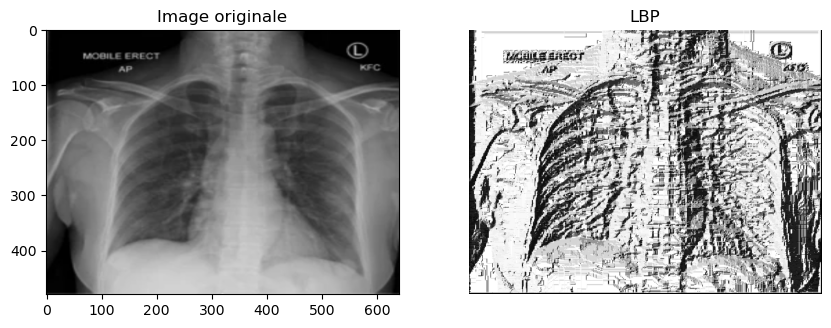

In [7]:
plt.figure(figsize=(10, 10))  # Création d'une nouvelle figure avec une taille de 10x10 pouces

# Premier sous-graphe
plt.subplot(1, 2, 1)  # Création d'un sous-graphe 1x2, première position
img = cv2.imread('COVID-13.png')  # Lecture de l'image 'COVID-13.png'
plt.title("Image originale")  # Ajout du titre au sous-graphe
plt.imshow(img, cmap='gray')  # Affichage de l'image en nuances de gris

# Deuxième sous-graphe
plt.subplot(1, 2, 2)  # Création d'un sous-graphe 1x2, deuxième position
plt.title("LBP")  # Ajout du titre au sous-graphe
imgLBP = Binarypattern(img)  # Appel de la fonction Binarypattern pour obtenir le motif binaire local (LBP) de l'image
plt.imshow(imgLBP, cmap='gray')  # Affichage de l'image LBP en nuances de gris
plt.axis('off')  # Suppression des axes pour une meilleure visualisation de l'image


(-0.5, 639.5, 479.5, -0.5)

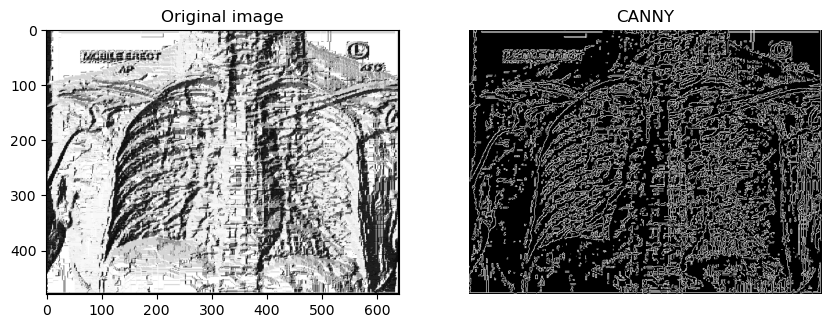

In [8]:
from skimage.transform import resize  # Importer la fonction resize de skimage pour redimensionner les images
from skimage.feature import hog  # Importer la fonction hog de skimage pour calculer les descripteurs HOG
import cv2  # Importer la bibliothèque OpenCV pour le traitement d'image
import numpy as np  # Importer la bibliothèque NumPy pour les calculs numériques
import matplotlib.pyplot as plt  # Importer la bibliothèque Matplotlib pour l'affichage des images

# Créer une figure de taille 10x10 pour afficher les images
plt.figure(figsize=(10, 10))

# Ajouter un sous-graphique (subplot) à la figure, 1ère position sur une grille de 1x2
plt.subplot(1,2,1)
img = imgLBP  # Charger l'image à traiter (ici, elle devrait être définie ailleurs dans le code)
# La première image doit être redimensionnée avant de la passer au descripteur HOG
plt.title("Original image")  # Ajouter un titre au sous-graphique
plt.imshow(img, cmap='gray')  # Afficher l'image en niveaux de gris

# Appliquer l'algorithme Canny pour détecter les contours dans l'image
edges = cv2.Canny(img, 300, 400, 3)  # Paramètres : seuils bas et haut, et taille de l'aperture pour les gradients Sobel

# Ajouter un deuxième sous-graphique (subplot) à la figure, 2ème position sur une grille de 1x2
plt.subplot(1,2,2)
plt.title("CANNY")  # Ajouter un titre au sous-graphique
plt.imshow(edges, cmap='gray')  # Afficher les contours détectés en niveaux de gris
plt.axis('off')  # Désactiver les axes pour ce sous-graphique


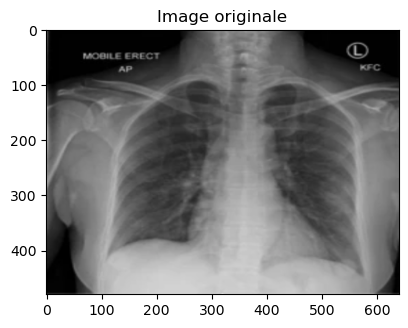

In [9]:
plt.figure(figsize=(10, 10))  # Création d'une figure de taille 10x10 pouces

plt.subplot(1, 2, 1)  # Création du premier sous-graphe dans une grille de 1x2
img = cv2.imread('COVID-13.png')  # Lecture de l'image 'COVID-13.png'
plt.title("Image originale")  # Ajout du titre "Image originale" au sous-graphe
plt.imshow(img, cmap='gray')  # Affichage de l'image en nuances de gris


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


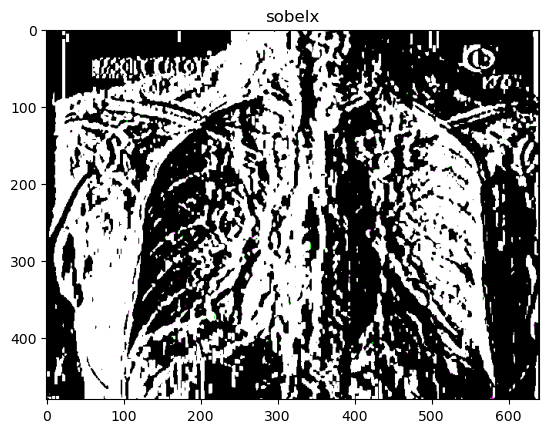

In [10]:
# Appliquer le filtre Sobel sur l'image pour détecter les contours horizontaux
sobelx = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)

# Ajouter un titre au graphique pour indiquer qu'il s'agit des contours détectés par le filtre Sobel sur l'axe X
plt.title("sobelx")

# Afficher l'image résultante en niveaux de gris
plt.imshow(sobelx, cmap='gray')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


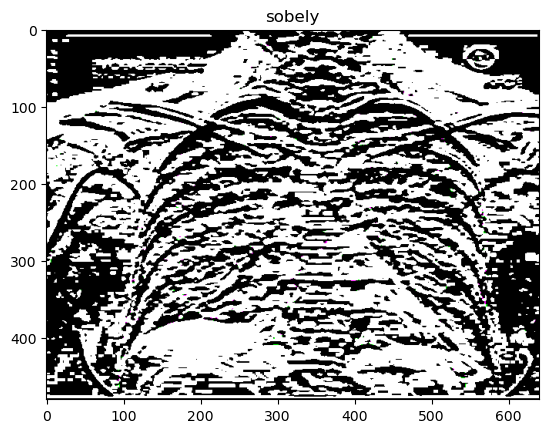

In [11]:
# Appliquer le filtre Sobel sur l'image pour détecter les contours verticaux
sobely = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)

# Ajouter un titre au graphique pour indiquer qu'il s'agit des contours détectés par le filtre Sobel sur l'axe Y
plt.title("sobely")

# Afficher l'image résultante en niveaux de gris
plt.imshow(sobely, cmap='gray')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


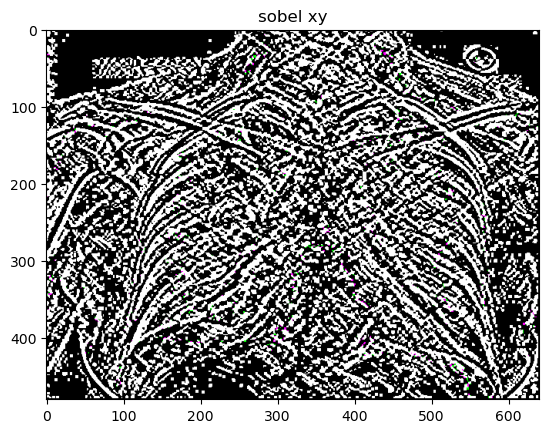

In [12]:
# Appliquer le filtre Sobel sur l'image pour détecter les contours à la fois horizontaux et verticaux
sobelxy = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

# Ajouter un titre au graphique pour indiquer qu'il s'agit des contours détectés par le filtre Sobel en combinant les axes X et Y
plt.title("sobel xy")

# Afficher l'image résultante en niveaux de gris
plt.imshow(sobelxy, cmap='gray')


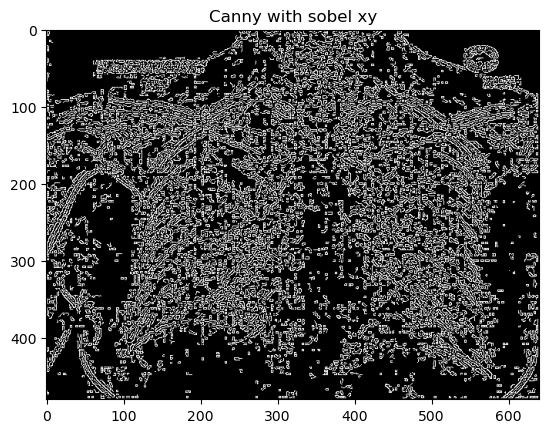

In [13]:
# Convertir l'image sobelxy en uint8
sobelxy_uint8 = np.uint8(np.absolute(sobelxy))

# Appliquer Canny
edges = cv2.Canny(sobelxy_uint8, 50, 100)

# Afficher l'image avec plt.imshow()
plt.title("Canny with sobel xy")
plt.imshow(edges, cmap='gray')
plt.show()


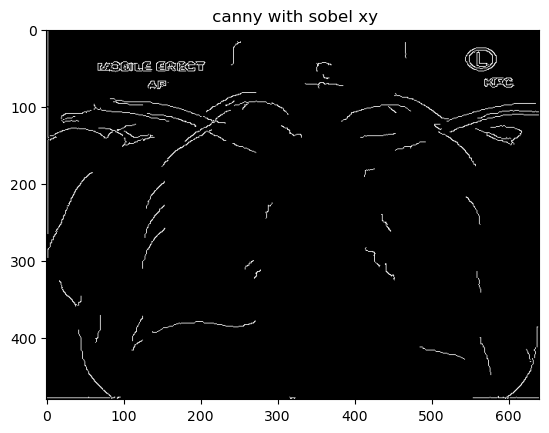

In [14]:
img = cv2.imread('COVID-13.png')
edges = cv2.Canny(img, 50,100,3)
plt.title(" canny with sobel xy")
plt.imshow(edges, cmap='gray')

In [15]:
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [16]:
def he_hsv(img_demo):
    # Convertir l'image de l'espace colorimétrique RGB à l'espace HSV
    img_hsv = cv2.cvtColor(img_demo, cv2.COLOR_RGB2HSV)

    # Égalisation d'histogramme sur le canal V (Valeur)
    img_hsv[:, :, 2] = cv2.equalizeHist(img_hsv[:, :, 2])

    # Convertir l'image de l'espace HSV de retour à l'espace RGB
    image_hsv = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
    
    # Retourner l'image convertie et égalisée
    return image_hsv

(-0.5, 639.5, 479.5, -0.5)

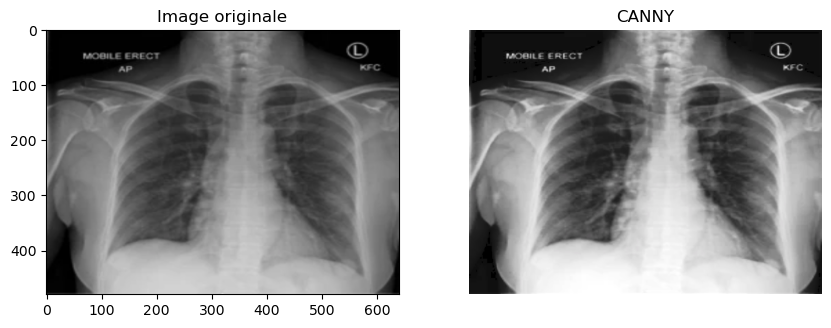

In [17]:
plt.figure(figsize=(10, 10))

# Affichage de la première image
plt.subplot(1,2,1)
img = cv2.imread('./COVID-13.png')
# La première image doit être redimensionnée avant d'être passée au descripteur HOG
plt.title("Image originale")
plt.imshow(img, cmap='gray')

# Application de la fonction he_hsv pour obtenir les bords de l'image
edges = he_hsv(img)

# Affichage des bords de l'image
plt.subplot(1,2,2)
plt.title("CANNY")
plt.imshow(edges, cmap='gray')
plt.axis('off')


# filtre mediane

(-0.5, 639.5, 479.5, -0.5)

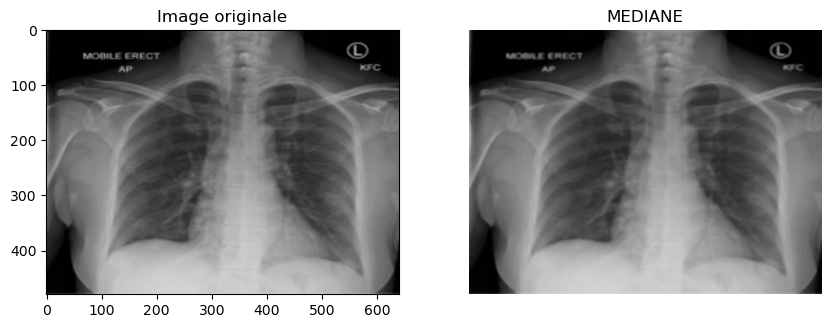

In [18]:
plt.figure(figsize=(10, 10))

# Affichage de la première image
plt.subplot(1,2,1)
img = cv2.imread('./COVID-13.png')
# La première image doit être redimensionnée avant d'être passée au descripteur HOG
plt.title("Image originale")
plt.imshow(img, cmap='gray')

# Application du filtre médian à l'image
median = cv2.medianBlur(img, 5)

# Affichage de l'image avec filtre médian
plt.subplot(1,2,2)
plt.title("MEDIANE")
plt.imshow(median, cmap='gray')
plt.axis('off')


# Normalisation

(-0.5, 639.5, 479.5, -0.5)

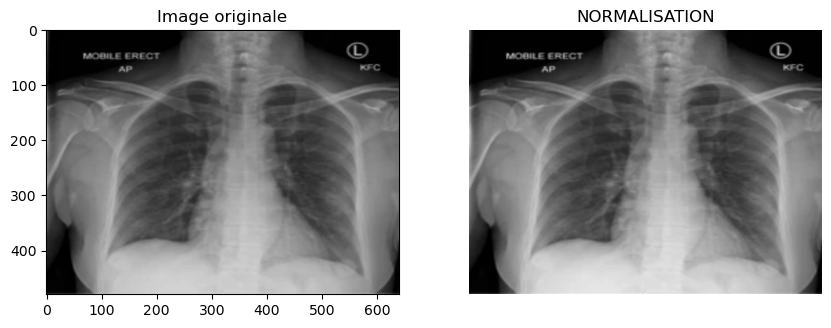

In [19]:
import cv2 as cv
import numpy as ppool

plt.figure(figsize=(10, 10))

# Affichage de la première image
plt.subplot(1,2,1)
img = cv2.imread('./COVID-13.png')
# La première image doit être redimensionnée avant d'être passée au descripteur HOG
plt.title("Image originale")
plt.imshow(img, cmap='gray')

# Création d'un tableau de zéros pour la normalisation
norm = ppool.zeros((800, 800))
# Normalisation de l'image
final = cv.normalize(img, norm, 0, 255, cv.NORM_MINMAX)

# Affichage de l'image normalisée
plt.subplot(1,2,2)
plt.title("NORMALISATION")
plt.imshow(final, cmap='gray')
plt.axis('off')


(-0.5, 639.5, 479.5, -0.5)

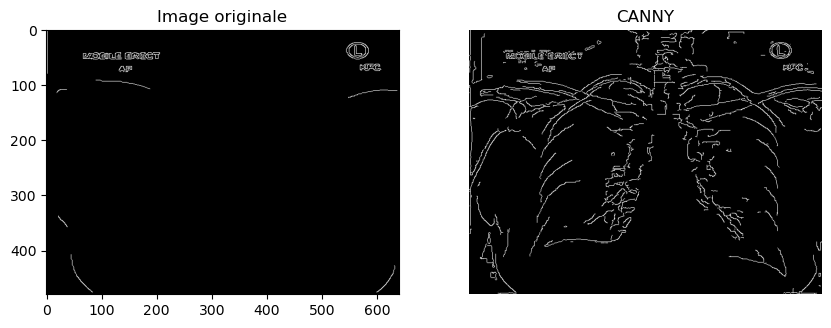

In [20]:
from skimage.transform import resize
from skimage.feature import hog
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

# Affichage de la première image
plt.subplot(1,2,1)
img = cv2.imread('./COVID-13.png')
edgess = cv2.Canny(img, 100 , 200 , 3)
# La première image doit être redimensionnée avant d'être passée au descripteur HOG
plt.title("Image originale")
plt.imshow(edgess, cmap='gray')

# Détection des bords sur l'image déjà transformée par Canny
edge = cv2.Canny(edges, 50 , 100 , 3)

# Affichage de l'image des bords détectés par Canny
plt.subplot(1,2,2)
plt.title("CANNY")
plt.imshow(edge, cmap='gray')
plt.axis('off')


(-0.5, 639.5, 479.5, -0.5)

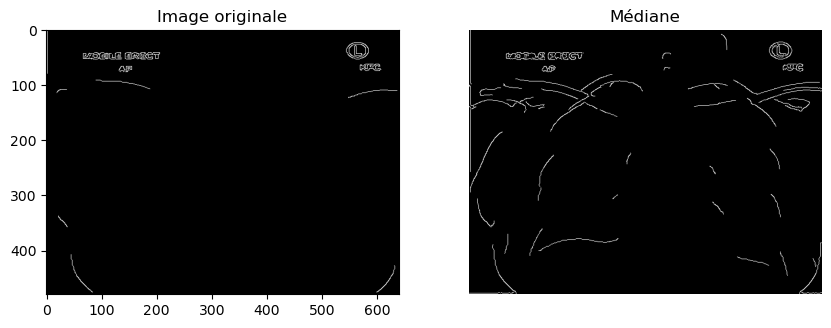

In [21]:
from skimage.transform import resize
from skimage.feature import hog
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

# Affichage de la première image
plt.subplot(1,2,1)
img = cv2.imread('./COVID-13.png')
edgess = cv2.Canny(img, 100 , 200 , 3)
# La première image doit être redimensionnée avant d'être passée au descripteur HOG
plt.title("Image originale")
plt.imshow(edgess, cmap='gray')

# Détection des bords sur l'image transformée par le filtre médian
edge = cv2.Canny(median, 50 , 100 , 3)

# Affichage de l'image des bords détectés par Canny après le filtre médian
plt.subplot(1,2,2)
plt.title("Médiane")
plt.imshow(edge, cmap='gray')
plt.axis('off')


In [22]:
import cv2 as cv
import numpy as ppool
from matplotlib import pyplot as plt

# Lecture de l'image
img = cv.imread('./COVID-13.png')

# Création d'un tableau numpy rempli de zéros de taille (800, 800)
norm = ppool.zeros((800, 800))

# Normalisation de l'image
final = cv.normalize(img, norm, 0, 255, cv.NORM_MINMAX)

# Affichage de l'image normalisée
cv.imshow('Image normalisée', final)

# Enregistrement de l'image normalisée
cv.imwrite('city_normalized.jpg', final)

# Attendre 5000 ms (5 secondes) pour que l'image reste affichée
cv.waitKey(5000)


-1

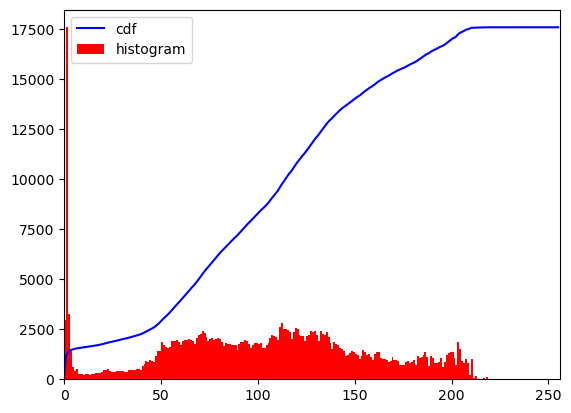

In [37]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('./COVID-13.png',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

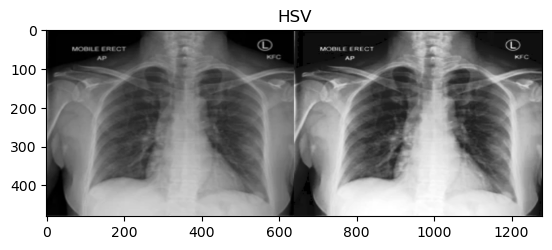

In [23]:
# Lecture de l'image en niveau de gris
img = cv.imread('./COVID-13.png', 0)

# Égalisation de l'histogramme de l'image
equ = cv.equalizeHist(img)

# Empilement des images côte à côte
res = np.hstack((img, equ))

# Affichage de l'image avec son histogramme égalisé
plt.title("HSV")
plt.imshow(res, cmap='gray')


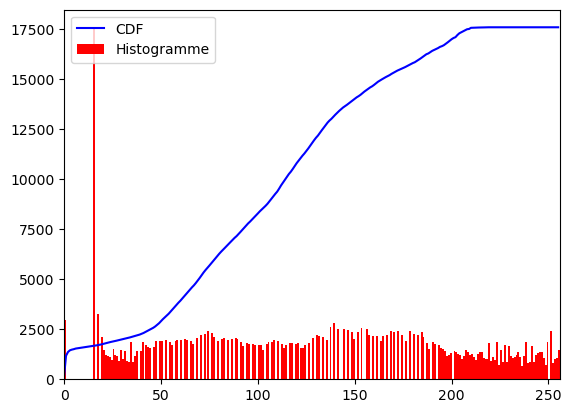

In [24]:
# Calcul de l'histogramme de l'image originale
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

# Calcul de la fonction de distribution cumulative (CDF) de l'histogramme
cdf = hist.cumsum()

# Normalisation de la CDF
cdf_normalized = cdf * float(hist.max()) / cdf.max()

# Tracé de la CDF en bleu
plt.plot(cdf_normalized, color='b')

# Tracé de l'histogramme égalisé en rouge
plt.hist(equ.flatten(), 256, [0, 256], color='r')

# Définition des limites de l'axe x
plt.xlim([0, 256])

# Ajout de la légende pour les tracés
plt.legend(('CDF', 'Histogramme'), loc='upper left')

# Affichage du graphique
plt.show()
